# Modelling Improved Donor Segmentation 
#### Charles Gardner 
#### MSDS 696 - Data Science Practicum II

## Importing libraries and data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import re
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

G:\Python\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
G:\Python\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
G:\Python\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [85]:
# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier  
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

# plotting
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Upload data on individual consituents
constituents = pd.read_csv("Constituents.csv") 
constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15613 entries, 0 to 15612
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Constituent ID                   15613 non-null  object 
 1   Constituent type                 15613 non-null  object 
 2   Constituent codes                5367 non-null   object 
 3   Lifetime giving                  15613 non-null  float64
 4   First gift amount                15611 non-null  float64
 5   First gift type                  15611 non-null  object 
 6   First gift date                  15611 non-null  object 
 7   Latest gift amount               15611 non-null  float64
 8   Latest gift type                 15611 non-null  object 
 9   Latest gift date                 15611 non-null  object 
 10  Greatest gift amount             15611 non-null  float64
 11  Greatest gift type               15611 non-null  object 
 12  Greatest gift date

In [6]:
# Upload pivot chart with the gift count
giftcount = pd.read_csv("Count of Gifts.csv")
giftcount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3767 entries, 0 to 3766
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Constituent ID  3767 non-null   object
 1   Gift Count      3767 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 59.0+ KB


## Combine different data from different databases

In [97]:
#Add the Count of Gift column to dataframe
combined = pd.merge(constituents, giftcount, on="Constituent ID", how="left")
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 15612
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Constituent ID                   15613 non-null  object 
 1   Constituent type                 15613 non-null  object 
 2   Constituent codes                5367 non-null   object 
 3   Lifetime giving                  15613 non-null  float64
 4   First gift amount                15611 non-null  float64
 5   First gift type                  15611 non-null  object 
 6   First gift date                  15611 non-null  object 
 7   Latest gift amount               15611 non-null  float64
 8   Latest gift type                 15611 non-null  object 
 9   Latest gift date                 15611 non-null  object 
 10  Greatest gift amount             15611 non-null  float64
 11  Greatest gift type               15611 non-null  object 
 12  Greatest gift date

## Feature Engineering

### Merge the several columns of events into a single one

In [98]:
#Iterate through columns that will separate values at ';' and then return dummy variables

col = ['Events, BPI', 'Events, Community Conversations', 'Events, Donor', 'Events, PA', 'Events, Prospect', 'Events, Sponsor', 'Events, Volunteer', 'Events, Womens Fund', 'Events, WSF']
list_dfs = []

for i in combined[col]:
    list_dfs.append(combined[i].str.replace(r"\([^()]*\)", ";").str.get_dummies(sep=';'))
    events = pd.concat(list_dfs, axis=1)   

#display(events)

In [99]:
# Sum each of the rows to create new column with total
events['total'] = events.sum(axis=1)
events.describe()

,,2005 Kickoff,2006 Carson luncheon,2006 Charitable giving seminar,2006 E. Carson Lecture,2006 Pastor lunch May,2008 Grant Recipient,2009 Appeal,2009 Weston event attendees,2010 Grant Award Breakfast,...,Women's Fund-2016 Fund Do Party Building Innovation,Women's Fund-2016 Fund Do Party Donation,Women's Fund-2017 Fund Do Party Launching Innovation,Women's Fund-2017 Fund Do Party Sparkling Innovation,2016 Holiday Volunteer Event,2017 Fund Do Party,Conversation with LaTida Smith,Jazz on the Rooftop,WSF Committee Dinner,total
count,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,...,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000,15613.000000
mean,0.000448,0.001153,0.000512,0.000705,0.003907,0.000192,0.000256,0.002370,0.001857,0.000256,...,0.000064,0.000320,0.000064,0.000256,0.003459,0.001857,0.002242,0.005957,0.003267,0.389099
std,0.021170,0.033936,0.022631,0.026535,0.062386,0.013861,0.016005,0.048625,0.043059,0.016005,...,0.008003,0.017893,0.008003,0.016005,0.058710,0.043059,0.047295,0.076951,0.057062,1.684643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


In [100]:
#Add events total as a new column at the end of primary dataframe
combined['Events Total'] = events['total']

# Remove original columns which list events 
combined.drop(combined.iloc[:, 25:34], inplace=True, axis=1)

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 15612
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Constituent ID                  15613 non-null  object 
 1   Constituent type                15613 non-null  object 
 2   Constituent codes               5367 non-null   object 
 3   Lifetime giving                 15613 non-null  float64
 4   First gift amount               15611 non-null  float64
 5   First gift type                 15611 non-null  object 
 6   First gift date                 15611 non-null  object 
 7   Latest gift amount              15611 non-null  float64
 8   Latest gift type                15611 non-null  object 
 9   Latest gift date                15611 non-null  object 
 10  Greatest gift amount            15611 non-null  float64
 11  Greatest gift type              15611 non-null  object 
 12  Greatest gift date              

### Convert columns from object type

In [101]:
# Recatorgorize financial columns from object to interger

col = ['Lifetime giving', 'First gift amount', 'Greatest gift amount', 'Latest gift amount']

for i in combined[col]:
    combined[i] = pd.to_numeric(combined[i])
   # df['column_name'] = pd.to_numeric(df['column_name'])

### Convert to datetime


In [102]:
#### Convert to datetime
col = ['First gift date', 'Greatest gift date', 'Latest gift date', 'Last action date', 'Date added']
list_dfs = []

for i in combined[col]:
    combined[i] = combined[i].astype('datetime64[ns]') 
    
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 15612
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Constituent ID                  15613 non-null  object        
 1   Constituent type                15613 non-null  object        
 2   Constituent codes               5367 non-null   object        
 3   Lifetime giving                 15613 non-null  float64       
 4   First gift amount               15611 non-null  float64       
 5   First gift type                 15611 non-null  object        
 6   First gift date                 15611 non-null  datetime64[ns]
 7   Latest gift amount              15611 non-null  float64       
 8   Latest gift type                15611 non-null  object        
 9   Latest gift date                15611 non-null  datetime64[ns]
 10  Greatest gift amount            15611 non-null  float64       
 11  Gr

In [103]:
# Add Column that lists the difference between date added and first gift date
combined['Days to First Gift'] = (combined['Date added'] - combined['First gift date']).abs().dt.days

# Add Column that lists the difference between date added and greatest gift date
combined['Days to Greatest Gift'] = (combined['Date added'] - combined['Greatest gift date']).abs().dt.days

# Add Column that lists the difference between latest gift and today
combined['Days since Last Gift'] = (combined['Latest gift date'] - datetime.now()).abs().dt.days

# Add Column that lists the difference between first and last gift
combined['Days between First and Last Gift'] = (combined['First gift date'] - combined['Latest gift date']).abs().dt.days

In [104]:
# Delete original datetime columns
combined.drop(['Date added', 'First gift date', 'Latest gift date', 'Greatest gift date', 'Last action date'], inplace=True, axis=1)

#combined.info()

In [ ]:
#Convert dates from object to datetime 
col = ['First gift date', 'Greatest gift date', 'Latest gift date', 'Last action date', 'Date added']
list_dfs = []

for i in combined[col]:
    combined[i] = combined[i].astype('datetime64[ns]') 
    
combined.info()

In [15]:
# Add Column that lists the difference between date added and first gift date
combined['Days to First Gift'] = (combined['Date added'] - combined['First gift date']).abs().dt.days

# Add Column that lists the difference between date added and greatest gift date
combined['Days to Greatest Gift'] = (combined['Date added'] - combined['Greatest gift date']).abs().dt.days

# Add Column that lists the difference between latest gift and today
combined['Days since Last Gift'] = (combined['Latest gift date'] - datetime.now()).abs().dt.days

# Add Column that lists the difference between first and last gift
combined['Days between First and Last Gift'] = (combined['First gift date'] - combined['Latest gift date']).abs().dt.days

In [16]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 15612
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Constituent ID                    15613 non-null  object        
 1   Constituent type                  15613 non-null  object        
 2   Constituent codes                 5367 non-null   object        
 3   Lifetime giving                   15613 non-null  float64       
 4   First gift amount                 15611 non-null  float64       
 5   First gift type                   15611 non-null  object        
 6   First gift date                   15611 non-null  datetime64[ns]
 7   Latest gift amount                15611 non-null  float64       
 8   Latest gift type                  15611 non-null  object        
 9   Latest gift date                  15611 non-null  datetime64[ns]
 10  Greatest gift amount              15611 non-nu

In [ ]:
# Delete datetime columns since they have already been transformed into float
combined.drop(['First gift date', 'Latest gift date', 'Greatest gift date', 'Last action date', 'Date added' ], inplace=True, axis=1)

### Relabelling and applying red hot encoding

In [18]:
combined.describe()

,Lifetime giving,First gift amount,Latest gift amount,Greatest gift amount,Spouse,BPI - Bass Society,"Committee, WSF Board+","Committees, Outside",Legacy,Original Building Donor - 2014,Stewardship Letters,Echo Award,Professional Advisors,Transformational Donor,Gift Count,Events Total,Days to First Gift,Days to Greatest Gift,Days since Last Gift,Days between First and Last Gift
count,1.561300e+04,1.561100e+04,1.561100e+04,1.561100e+04,15613.000000,62.0,66.0,102.0,15613.000000,9.0,106.0,115.0,244.0,23.0,3930.000000,15613.000000,15611.000000,15611.000000,15611.000000,15611.000000
mean,8.233011e+04,8.473649e+03,1.407822e+04,3.422836e+04,0.378595,1.0,1.0,1.0,0.032345,1.0,1.0,1.0,1.0,1.0,4.941221,0.389099,443.797451,934.844020,3591.469925,1213.305810
std,2.794306e+06,1.250978e+05,1.004086e+06,1.300766e+06,0.485052,0.0,0.0,0.0,0.176920,0.0,0.0,0.0,0.0,0.0,17.198328,1.684643,1566.887282,1914.158834,2417.259051,2417.638666
min,0.000000e+00,1.000000e+00,6.000000e-02,1.000000e+00,0.000000,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,0.000000,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,1.000000,0.000000,1.000000,1.000000,1416.000000,0.000000
50%,1.750000e+02,1.000000e+02,1.000000e+02,1.000000e+02,0.000000,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,2.000000,0.000000,3.000000,4.000000,3587.000000,0.000000
75%,1.000000e+03,2.500000e+02,2.500000e+02,5.000000e+02,1.000000,1.0,1.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0,4.000000,0.000000,15.000000,747.500000,5217.000000,1432.000000
max,3.258273e+08,8.000000e+06,1.250000e+08,1.250000e+08,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,600.000000,29.000000,89121.000000,9633.000000,10828.000000,98567.000000


### Red Hot Encoding

In [107]:
#Itterate through columns that will separate values at ';' and then return dummy variables
#Also eliminate dates and numbers so that there can be better groupings

col = ['First gift type', 'Latest gift type', 'Greatest gift type', 'Last action category', 'Constituent codes', 'Constituent type', 'Prospect classification', 'Prospect status', 'Prospect Type', 'Gender', 'Tags', 'Committee, WSF-Driven','Community Groups', 'Solicit codes', 'Tax Status' ]
list_dfs = []

for i in combined[col]:
    list_dfs.append(combined[i].str.replace(r"\([^()]*\)", ";").str.replace('\d+', ' ').str.get_dummies(sep=';'))
    dummy_df = pd.concat(list_dfs, axis=1) 

dummy_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 15612
Data columns (total 142 columns):
 #    Column                                               Non-Null Count  Dtype
---   ------                                               --------------  -----
 0    Gift-in-kind                                         15613 non-null  int64
 1    One-time gift                                        15613 non-null  int64
 2    Other                                                15613 non-null  int64
 3    Pledge                                               15613 non-null  int64
 4    Pledge payment                                       15613 non-null  int64
 5    Recurring gift payment                               15613 non-null  int64
 6    Soft credit one-time gift                            15613 non-null  int64
 7    Soft credit other                                    15613 non-null  int64
 8    Soft credit pledge                                   15613 non-null  int64

In [108]:
# Delete dummy columns that either would add multicollinearity or are not meaningful to analysis
dummy_df.drop(['Organization', 'Male', 'Upcoming birthday', ' ', '  '], inplace=True, axis=1)

# Add the dummy variables to the original dataframe
recoded = pd.concat([combined, dummy_df], axis=1)

# Delete the original columns that have been tranformed
recoded.drop(['First gift type', 'Latest gift type', 'Greatest gift type', 'Last action category', 'Constituent codes', 'Constituent type', 'Prospect classification', 'Prospect status', 'Prospect Type', 'Gender', 'Tags', 'Committee, WSF-Driven','Community Groups', 'Solicit codes', 'Tax Status' ], inplace=True, axis=1)

### Add column with categorical values for target feature

In [109]:
# Create bins for lifetime giving. This will be used for target column 
# Bins limits are based upon Foundation's guidelines of establishing donor advised funds
recoded["Donor Tier"] = pd.cut(recoded["Lifetime giving"],[-.5, 10000, 25000, 1000000000], precision=0, labels=['$1+', '$10,000+','$25,000+'])

#Check value count for target column
print(recoded['Donor Tier'].value_counts())

$1+         13884
$25,000+     1348
$10,000+      381
Name: Donor Tier, dtype: int64


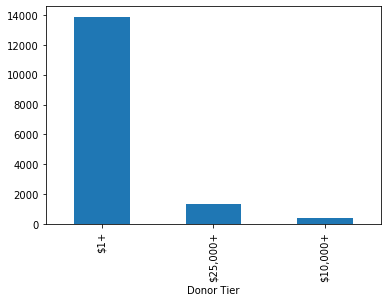

In [110]:
# Plot donor tier column
barplot = recoded.value_counts(recoded['Donor Tier']).plot.bar()

The data is higly imbalanced and with $1-$10,000 bin having nearly ten times the number of constituents as the other two combined. 

## Filling in NaN values

In [111]:
# Filling in all the NaN values with a 0 since the data is pretty sparse and likely no value means zero
recoded.iloc[:,0:-1] = recoded.iloc[:,0:-1].fillna(value=0)

#Verify that the columns are correct type and are complete
recoded.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 15612
Data columns (total 158 columns):
 #    Column                                               Non-Null Count  Dtype   
---   ------                                               --------------  -----   
 0    Constituent ID                                       15613 non-null  object  
 1    Lifetime giving                                      15613 non-null  float64 
 2    First gift amount                                    15613 non-null  float64 
 3    Latest gift amount                                   15613 non-null  float64 
 4    Greatest gift amount                                 15613 non-null  float64 
 5    Spouse                                               15613 non-null  int64   
 6    BPI - Bass Society                                   15613 non-null  float64 
 7    Committee, WSF Board+                                15613 non-null  float64 
 8    Committees, Outside                         

## Correlation Analysis between Lifetime Giving


In [112]:
# Lifetime giving Correlations
corrLG = recoded.corrwith(recoded['Lifetime giving']).sort_values(ascending=False)

#pd.set_option('display.max_rows', None)
print(corrLG)

Lifetime giving                                        1.000000
Latest gift amount                                     0.936161
Greatest gift amount                                   0.933074
Pending Ask                                            0.305397
Centennial A                                           0.201668
No contact                                             0.116252
No meeting                                             0.110902
Meeting                                                0.083612
First gift amount                                      0.081732
Professional Advisor                                   0.073691
Transformational Donor                                 0.071792
Events Total                                           0.065722
Days to Greatest Gift                                  0.063759
Days between First and Last Gift                       0.060552
Lapsing donor                                          0.043729
Next Century Ambassadors                

The two features with the strongest correlation are Last gift amount and greatest gift amount (both around 93%). This makes sense since they are part of a continuum. All the other features are a lot less correlated with Pending Ask (31%) and Centennial A (20%) being the next strongest. Surprisingly, First gift amount only has an 8% correlation. This may indicate a trend of donors increasing their gifts over time.

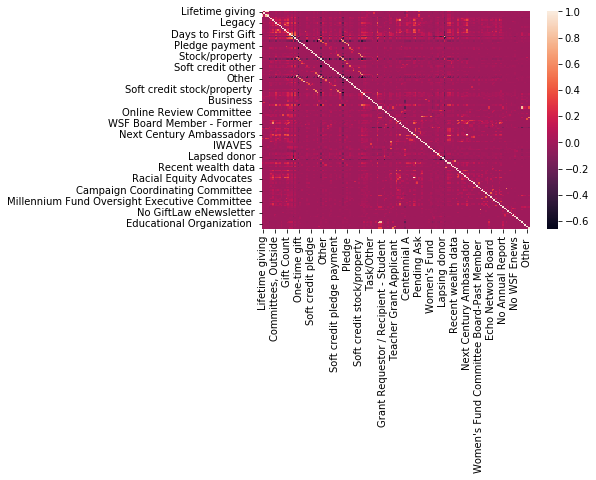

In [260]:
_ = sns.heatmap(recoded.corr())

### Visualizing Correlations

Begin creating a few plots of Lifetime Giving with different correlated features. 

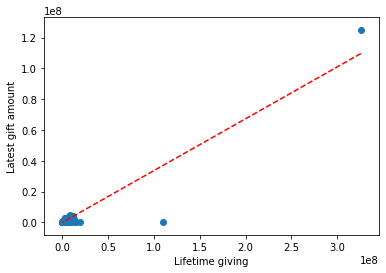

In [114]:
x = recoded['Lifetime giving']
y = recoded['Latest gift amount']

# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.scatter(x, y)

#add axis labels
plt.xlabel('Lifetime giving')
plt.ylabel('Latest gift amount')
plt.show()

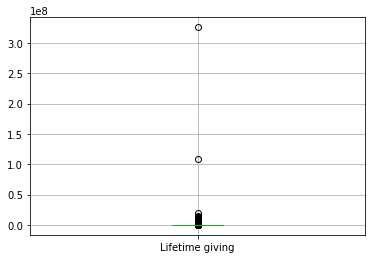

In [115]:
recoded.boxplot(column= ['Lifetime giving'])

There are two values that are extreme outliers and potentially skewing the data. After looking at the original data, I realize that both of these are the same constituent, and it may be best to drop them. 

In [116]:
#Drop the two rows that are outliers for lifetime giving
outdf = recoded.drop([0, 1])
outdf.head()

,Constituent ID,Lifetime giving,First gift amount,Latest gift amount,Greatest gift amount,Spouse,BPI - Bass Society,"Committee, WSF Board+","Committees, Outside",Legacy,...,No WSF Enews,Phantom Record,Private Nonoperating Foundation,Private Operating Foundation,Public Charity,Educational Organization,Governmental Organization,Other,Religious Organization,Donor Tier
2,1996.MID.00222,19500035.73,30000.00,202359.50,488854.91,1,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,"$25,000+"
3,2019.1118,15343682.62,6574304.06,17854.74,6574304.06,0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,"$25,000+"
4,2007.2694,13258908.58,25000.00,260839.66,6359311.95,0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,"$25,000+"
5,2007.5756,13021879.81,493900.00,1000000.00,1439000.00,1,0.0,0.0,0.0,1,...,1,0,0,0,0,0,0,0,0,"$25,000+"
6,2010.161,13001377.74,493900.00,1000000.00,1439000.00,1,0.0,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,"$25,000+"


### Recreate scatter plot after eliminating the significant outliers

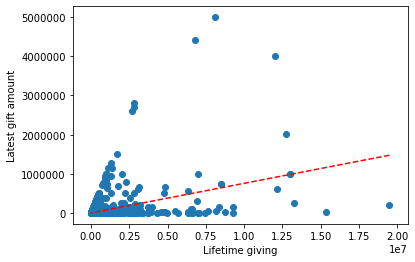

In [117]:
# Plot Lifetime Giving by Latest gift
x = outdf['Lifetime giving']
y = outdf['Latest gift amount']

# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.scatter(x, y)

#add axis labels
plt.xlabel('Lifetime giving')
plt.ylabel('Latest gift amount')
plt.show()

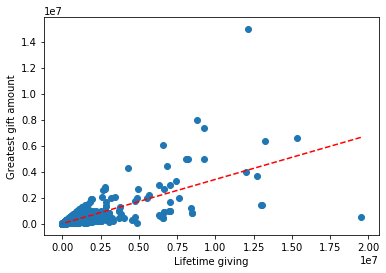

In [118]:
# Plot Lifetime Giving by greatest gift

x = outdf['Lifetime giving']
y = outdf['Greatest gift amount']

# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.scatter(x, y)

#add axis labels
plt.xlabel('Lifetime giving')
plt.ylabel('Greatest gift amount')
plt.show()

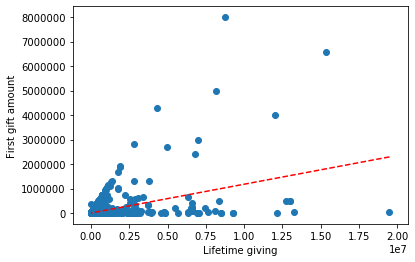

In [119]:
# Plot Lifetime Giving by first gift

x = outdf['Lifetime giving']
y = outdf['First gift amount']

# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.scatter(x, y)

#add axis labels
plt.xlabel('Lifetime giving')
plt.ylabel('First gift amount')
plt.show()

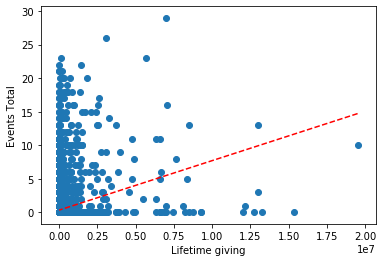

In [120]:
# Plot Lifetime Giving by Events attended

x = outdf['Lifetime giving']
y = outdf['Events Total']


# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.scatter(x, y)

#add axis labels
plt.xlabel('Lifetime giving')
plt.ylabel('Events Total')
plt.show()

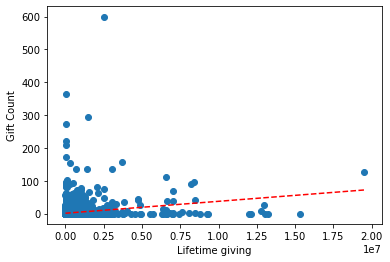

In [121]:
# Plot Lifetime Giving by Gift count

x = outdf['Lifetime giving']
y = outdf['Gift Count']


# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.scatter(x, y)

#add axis labels
plt.xlabel('Lifetime giving')
plt.ylabel('Gift Count')
plt.show()

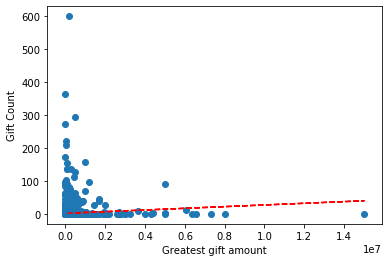

In [122]:
# Plot Greatest Gift by Gift count

x = outdf['Greatest gift amount']
y = outdf['Gift Count']


# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.scatter(x, y)

#add axis labels
plt.xlabel('Greatest gift amount')
plt.ylabel('Gift Count')
plt.show()

There do seem to be some correlation, but also clear that there is a lot of variance in the data, and a simple linear regression may not be best model. 

## Preparing for Machine Learning Models

In [123]:
# Review info for dataframe
outdf.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15611 entries, 2 to 15612
Data columns (total 158 columns):
 #    Column                                               Non-Null Count  Dtype   
---   ------                                               --------------  -----   
 0    Constituent ID                                       15611 non-null  object  
 1    Lifetime giving                                      15611 non-null  float64 
 2    First gift amount                                    15611 non-null  float64 
 3    Latest gift amount                                   15611 non-null  float64 
 4    Greatest gift amount                                 15611 non-null  float64 
 5    Spouse                                               15611 non-null  int64   
 6    BPI - Bass Society                                   15611 non-null  float64 
 7    Committee, WSF Board+                                15611 non-null  float64 
 8    Committees, Outside                         

In [141]:
#Standardize the features
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(outdf.iloc[:,1:157]))
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,39.343146,0.172084,2.283593,2.073024,1.281018,-0.063146,-0.065159,-0.081098,5.469266,-0.024018,...,-0.024018,-0.161746,-0.02118,-0.02996,-0.008004,-0.111883,-0.028869,-0.017899,-0.028869,-0.046719
1,30.933831,52.487240,0.137092,28.969013,-0.780629,-0.063146,-0.065159,-0.081098,-0.182840,-0.024018,...,-0.024018,-0.161746,-0.02118,-0.02996,-0.008004,-0.111883,-0.028869,-0.017899,-0.028869,-0.046719
2,26.715825,0.132114,2.963943,28.018808,-0.780629,-0.063146,-0.065159,-0.081098,-0.182840,-0.024018,...,-0.024018,-0.161746,-0.02118,-0.02996,-0.008004,8.937897,-0.028869,-0.017899,-0.028869,-0.046719
3,26.236258,3.880500,11.563226,6.272400,1.281018,-0.063146,-0.065159,-0.081098,5.469266,-0.024018,...,-0.024018,6.182525,-0.02118,-0.02996,-0.008004,-0.111883,-0.028869,-0.017899,-0.028869,-0.046719
4,26.194777,3.880500,11.563226,6.272400,1.281018,-0.063146,15.346997,-0.081098,5.469266,-0.024018,...,-0.024018,-0.161746,-0.02118,-0.02996,-0.008004,-0.111883,-0.028869,-0.017899,-0.028869,-0.046719


In [200]:
# Identify which columns are features (non-scaled)
features = outdf.iloc[:,1:157]

#Identify the two columns that are the target (one continous and one categorical)
cont_target = pd.DataFrame(outdf.iloc[:,1])
cat_target = pd.DataFrame(outdf.iloc[:,-1])

#Identify scaled features and continuous target
scaled_features = scaled_data.iloc[:,1:156]
scaled_target = pd.DataFrame(scaled_data.iloc[:,0])

## Creating Logistic Regression Model 

In [326]:
#Splitting data into training and testing
train_data, test_data, train_lbl, test_lbl = train_test_split( scaled_features, cat_target, test_size=.2, random_state=0)


In [327]:
# Initialize the logistic regression model
logisticRegr = LogisticRegression(solver = 'lbfgs')

# Train the Model
logisticRegr.fit(train_data, train_lbl)


LogisticRegression()

In [328]:
# Make predictions
y_pred = logisticRegr.predict(test_data) # Predictions
y_true = test_lbl # True values


print("Train accuracy:", np.round(accuracy_score(y_train, logisticRegr.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))


Train accuracy: 0.97
Test accuracy: 0.97


In [324]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         $1+       0.95      0.99      0.97      2758
    $10,000+       0.00      0.00      0.00        72
    $25,000+       0.79      0.69      0.74       293

    accuracy                           0.94      3123
   macro avg       0.58      0.56      0.57      3123
weighted avg       0.92      0.94      0.93      3123




Test confusion_matrix


Text(33.0, 0.5, 'True')

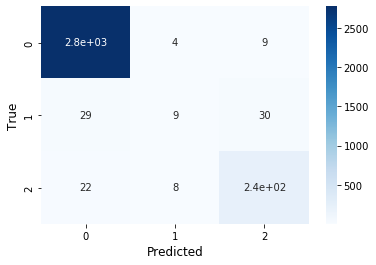

In [191]:
# Make the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

It is surprising that that this model creates an accuracy score of 96%, but I think this is due to the imbalanced nature of the dataset. It can predict the constituent falling into the $1-$1000 bin all the time and still it would be over 90% accurate. 

But for fundraising it is more important identify which constituents would be donors in the higher tiers.  And actually, it may be beneficial for Foundation staff to engage the ~39 consituents who are predicted to be in highest teir but are in the lowest and middle tiers, since staff may be able to steward them to increase their gifts. 

### Applying Principal Component Analysis

In [208]:
#Setting number of Principal Components
pca = PCA(n_components = 25)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,34.071610,25.816570,-0.919578,17.794430,-0.105819,16.915229,-2.900929,5.207816,3.256618,0.936866,...,0.247256,-1.054271,-6.929479,0.525868,-0.259098,1.326088,2.285988,-3.000248,0.233215,-5.316866
1,7.448663,4.496782,8.432204,24.592153,0.116146,39.811120,13.171954,-24.337337,1.491019,0.834981,...,-4.053700,-4.393459,5.866654,2.523042,2.884141,-4.172318,-5.112943,0.155208,-5.148452,-2.947062
2,5.125789,4.006535,16.651754,13.007134,-0.880933,17.898714,6.927905,-11.206774,1.813370,0.832613,...,-2.112848,-8.613687,-2.407924,-0.895127,0.238874,5.485471,-1.414499,-1.087312,-1.605443,1.042692
3,20.486802,5.921695,1.039622,11.881920,-0.377445,14.051288,5.790433,-9.730555,-0.260415,1.731033,...,0.901784,-4.229680,-2.952762,4.677183,2.615871,4.350468,-3.559060,4.513763,7.522425,5.326406
4,29.239856,23.437811,0.468684,8.722249,0.969954,20.456320,9.319799,-7.552592,5.150078,4.497456,...,2.902517,16.367311,-7.429905,-0.849432,-10.062839,13.039991,10.369738,8.894694,0.286868,-13.530045


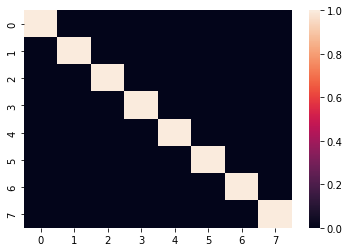

In [198]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

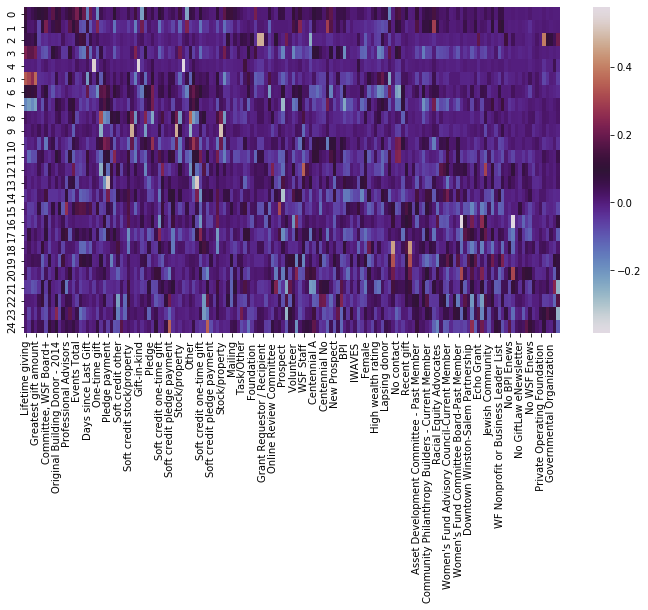

In [209]:
#Check feature importance in both PCAs
map= pd.DataFrame(pca.components_, columns=features.columns.values)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

In [212]:
#Check how much each of these Principal Components explain the data
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[5.33354491 2.63146243 2.34947111 2.02947337 1.69450817 1.64250945
 1.51451014 1.48475838 1.40467723 1.37587321 1.37023174 1.29808442
 1.22445475 1.18157645 1.1470049  1.12235926 1.07212742 1.04956588
 1.02684853 0.99723119 0.97440936 0.94958925 0.92671065 0.90122827
 0.88148403]


There isn't a stand-out feature that comprises a major part of either PCs, most of them around 2%-5%. And similarly the two PCA's only explain 2%-5% of the variance in the data. This means that it may be hard to create a strong predictive model with just two PCAs. This is confirmed by the plot below that shows that the target variables significantly overlap and are not distinct. 

#### Plotting two dimensional PCA

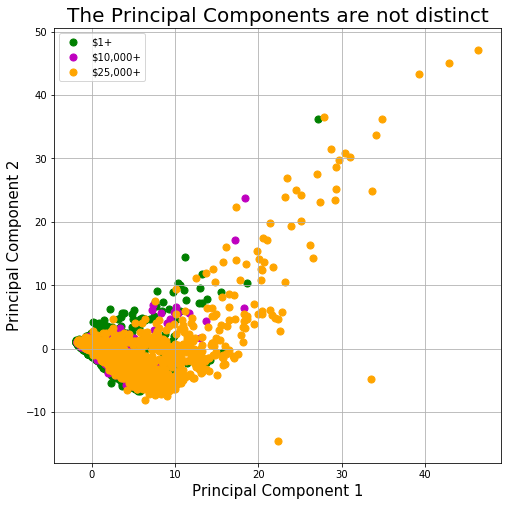

In [251]:
# Merge PCA data with categorical data
finalDF = pd.concat([data_pca, cat_target], axis = 1)
# finalDF.info()

# Plot two Principle Componenets 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('The Principal Components are not distinct', fontsize = 20)
targets = ['$1+','$10,000+','$25,000+'] 
colors = ['g', 'm','orange']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Donor Tier']  == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'] , finalDf.loc[indicesToKeep, 'PC2'] , c = color, s = 50)
ax.legend(targets)
ax.grid()

Text(0, 0.5, 'Explained variance (%)')

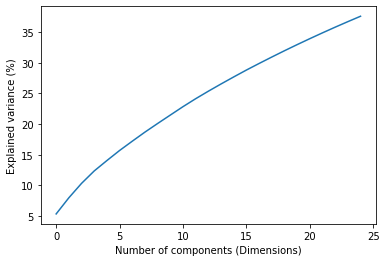

In [211]:
# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

There is no clear elbow in the skree plot indicating how many PCs would be beneficial. Reviwing the variance percent of the PCs is also unclear. Perhaps around 16, when the individual PC's variance drops below 1%, but then you are still only explaining about 25% of the variance overall. 

### Applying KNN to data

In [286]:
#Setting the Target and Features
X = scaled_features.values
y = cat_target.values

#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [287]:
#Setting KNN Classifier
#define and fit our model
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [288]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

#Test the accuracy of the model when the k vlaue is 1
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         $1+       0.96      0.97      0.97      2766
    $10,000+       0.14      0.15      0.15        81
    $25,000+       0.74      0.61      0.67       276

    accuracy                           0.92      3123
   macro avg       0.62      0.58      0.59      3123
weighted avg       0.92      0.92      0.92      3123



In [289]:
# Create a for loop that will test the accuracy of each k value between 2 and 20, and an empty array to hold the accuracy rates. 
accuracy = []
for k in range(2, 21):
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))

# Display the accuracy rates
accuracy

[0.925392251040666,
 0.9333973743195645,
 0.9298751200768491,
 0.9333973743195645,
 0.9324367595260967,
 0.9324367595260967,
 0.9324367595260967,
 0.9330771693884086,
 0.9327569644572526,
 0.9321165545949408,
 0.9317963496637848,
 0.9321165545949408,
 0.9317963496637848,
 0.9311559398014729,
 0.9301953250080052,
 0.9285943003522255,
 0.9298751200768491,
 0.9285943003522255,
 0.9292347102145373]

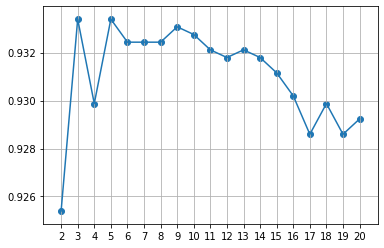

In [290]:
# display the results
plt.plot(range(2, 21), accuracy)
plt.scatter(range(2, 21), accuracy)
plt.grid()
_ =plt.xticks(range(2, 21))

In [296]:
#Creating a KNN model with k value beign 3
model_3 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model_3.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds_3 = model_3.predict(X_test)
print(classification_report(y_test, preds_3))


              precision    recall  f1-score   support

         $1+       0.95      0.99      0.97      2766
    $10,000+       0.16      0.06      0.09        81
    $25,000+       0.80      0.61      0.69       276

    accuracy                           0.93      3123
   macro avg       0.64      0.56      0.58      3123
weighted avg       0.92      0.93      0.92      3123



In [300]:
#Setting the Target and Features
X = scaled_features.values
y = cat_target.values

#Split into training and testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [301]:
#Creating MinMax Object and then transforming the feature values to be between '0' and '1'
mm = preprocessing.MinMaxScaler()
X2_train = mm.fit_transform(X2_train)
X2_test = mm.transform(X2_test)

# Create a for loop that will test the accuracy of each k value between 2 and 20, and an empty array to hold the accuracy rates. 
accuracy2 = []
for k in range(2, 21):
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X2_train, y2_train)
    accuracy2.append(model.score(X2_test, y2_test))

# Display the accuracy rates
accuracy2

[0.925392251040666,
 0.9356388088376562,
 0.9327569644572526,
 0.9375600384245918,
 0.936279218699968,
 0.9372398334934358,
 0.9365994236311239,
 0.9369196285622798,
 0.9372398334934358,
 0.9385206532180596,
 0.9356388088376562,
 0.936279218699968,
 0.9353186039065001,
 0.9346781940441883,
 0.9346781940441883,
 0.9343579891130324,
 0.9343579891130324,
 0.9343579891130324,
 0.9330771693884086]

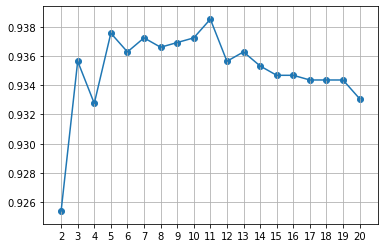

In [302]:
# display the results
plt.plot(range(2, 21), accuracy2)
plt.scatter(range(2, 21), accuracy2)
plt.grid()
_ =plt.xticks(range(2, 21))

Both 5 clusters and 11 clusters have similar accuracy. While 11 is a bit better, I will choose 5 clusters to help avoid overfitting the model

In [317]:
#Creating a KNN model with k value beign 5
model_11 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model_11.fit(X2_train, y2_train)

# gather the predictations that our model made for our test set
preds_11 = model_11.predict(X2_test)
print(classification_report(y2_test, preds_11))

              precision    recall  f1-score   support

         $1+       0.95      0.99      0.97      2754
    $10,000+       0.22      0.06      0.09        69
    $25,000+       0.86      0.65      0.74       300

    accuracy                           0.94      3123
   macro avg       0.68      0.57      0.60      3123
weighted avg       0.92      0.94      0.93      3123



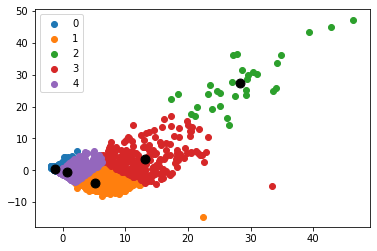

In [318]:
#Load Data
data = scaled_data
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

#Import KMeans module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 5)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

## Use PCA to develop Logistic Regression model

In [214]:
# Select 16 for the number of PCs
pca = PCA(n_components=16)
X_pca = pca.fit_transform(scaled_features)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())

          0          1          2          3         4          5         6   \
0  28.664296  22.773654  -2.722240 -10.418285  0.575011 -13.961912  1.175257   
1   2.319230  -0.215516   4.773384  -9.349084 -0.232742  -8.850245  4.356014   
2   1.069775   0.707861  14.249816  -4.919111 -0.901248  -1.846865  1.703515   
3  16.767059   3.486702  -0.931995  -4.438482 -0.773530  -0.255601  0.565896   
4  25.382732  21.015974  -0.824663  -1.703902  0.772776  -4.304147  5.542171   

         7          8         9          10         11        12        13  \
0  3.190632  -4.793952  3.027988   0.678594  -3.784684 -0.404370  9.040973   
1 -3.877479  13.333191 -6.019382  27.552473  32.072353 -3.922082  4.572665   
2 -0.182339   3.665889 -4.124165   9.099867   9.497932 -3.356857  3.089577   
3 -1.864440   0.065164  0.185903   6.662642   7.338529 -1.761464  2.164965   
4  3.542666  -5.172079  6.364663  18.430392   6.643393  1.340190  8.795492   

         14        15  
0 -6.810474  0.057951  
1 

In [235]:
#Splitting Principle Components into training and testing
train_data_pca, test_data_pca, train_lbl, test_lbl = train_test_split(X_pca, cat_target, test_size=0.2, random_state=2)


In [236]:
# Initialize the logistic regression model
logisticRegr = LogisticRegression(solver = 'lbfgs')

# Train the Model
logisticRegr.fit(train_data_pca, train_lbl)

LogisticRegression()

In [237]:
# Make predictions
y_pred = logisticRegr.predict(test_data_pca) # Predictions
y_true = test_lbl # True values

print("Train accuracy:", np.round(accuracy_score(train_lbl, logisticRegr.predict(train_data_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

Train accuracy: 0.94
Test accuracy: 0.94



Test confusion_matrix


Text(33.0, 0.5, 'True')

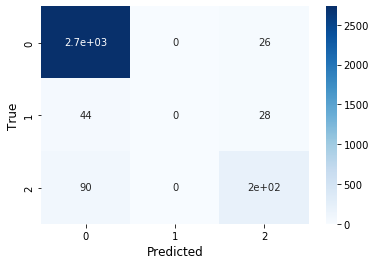

In [238]:
# Make the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

Using PCA for Logisitic Regression actually makes the acuracy even worse overall. Looking at the confusion matrix, the Logistic model didn't make any predictions for the middle tier. This is probably because it was by far the fewest number of donors in the original data set, so the PCA didn't prioritize this when selecting features. Since there was no elbow in the Skree plot, adding more PCs would increase the accuracy incrementally, but it could also lead to overfitting of the model.  

### USE PCA to develop Artificial Neural Network

In [270]:
#gather up names of all the columns
cols = X_pca.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'Donor Tier'
feature_cols = [c for c in cols if c != prediction_col]

X = X_pca[feature_cols]
y = outlier[prediction_col]

#split the dataset into the train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [271]:
#Scaling data to ensure that they are uniformly evaluated
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

In [356]:
from sklearn.neural_network import MLPClassifier  

In [248]:
# Neural Network Algorithm
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(x_train, y_train.values.ravel()) 

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [249]:
# make predictions
predictions = mlp.predict(x_test)  

In [250]:
# Display Accuracy of Model
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         $1+       0.96      0.99      0.97      2776
    $10,000+       0.33      0.01      0.02        87
    $25,000+       0.77      0.82      0.79       260

    accuracy                           0.94      3123
   macro avg       0.69      0.61      0.60      3123
weighted avg       0.93      0.94      0.93      3123



Training set loss: 0.118919


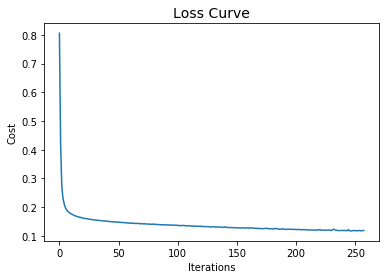

In [246]:
print("Training set loss: %f" % mlp.loss_)

#Plotting the Loss Curve
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

We can see that it only takes about 12 epochs for the model to signficantly improve. After that the loss curve did show improvements, but largely plataued. 

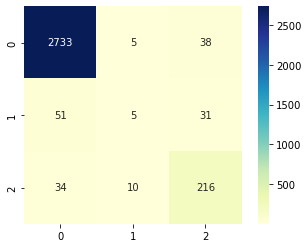

In [361]:
#Create confustion Matrix
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGnBu")

In [286]:
#Setting the Target and Features
X = scaled_features.values
y = cat_target.values

#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [287]:
#Setting KNN Classifier
#define and fit our model
model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

In [288]:
# gather the predictations that our model made for our test set
preds = model.predict(X_test)

#Test the accuracy of the model when the k vlaue is 1
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         $1+       0.96      0.97      0.97      2766
    $10,000+       0.14      0.15      0.15        81
    $25,000+       0.74      0.61      0.67       276

    accuracy                           0.92      3123
   macro avg       0.62      0.58      0.59      3123
weighted avg       0.92      0.92      0.92      3123



In [289]:
# Create a for loop that will test the accuracy of each k value between 2 and 20, and an empty array to hold the accuracy rates. 
accuracy = []
for k in range(2, 21):
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test))

# Display the accuracy rates
accuracy

[0.925392251040666,
 0.9333973743195645,
 0.9298751200768491,
 0.9333973743195645,
 0.9324367595260967,
 0.9324367595260967,
 0.9324367595260967,
 0.9330771693884086,
 0.9327569644572526,
 0.9321165545949408,
 0.9317963496637848,
 0.9321165545949408,
 0.9317963496637848,
 0.9311559398014729,
 0.9301953250080052,
 0.9285943003522255,
 0.9298751200768491,
 0.9285943003522255,
 0.9292347102145373]

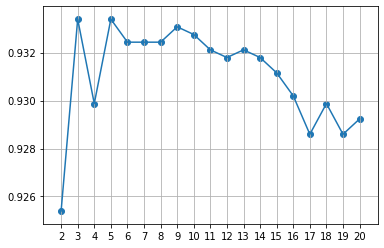

In [290]:
# display the results
plt.plot(range(2, 21), accuracy)
plt.scatter(range(2, 21), accuracy)
plt.grid()
_ =plt.xticks(range(2, 21))

In [296]:
#Creating a KNN model with k value beign 3
model_3 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model_3.fit(X_train, y_train)

# gather the predictations that our model made for our test set
preds_3 = model_3.predict(X_test)
print(classification_report(y_test, preds_3))


              precision    recall  f1-score   support

         $1+       0.95      0.99      0.97      2766
    $10,000+       0.16      0.06      0.09        81
    $25,000+       0.80      0.61      0.69       276

    accuracy                           0.93      3123
   macro avg       0.64      0.56      0.58      3123
weighted avg       0.92      0.93      0.92      3123



In [300]:
#Setting the Target and Features
X = scaled_features.values
y = cat_target.values

#Split into training and testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [301]:
#Creating MinMax Object and then transforming the feature values to be between '0' and '1'
mm = preprocessing.MinMaxScaler()
X2_train = mm.fit_transform(X2_train)
X2_test = mm.transform(X2_test)

# Create a for loop that will test the accuracy of each k value between 2 and 20, and an empty array to hold the accuracy rates. 
accuracy2 = []
for k in range(2, 21):
    # n_jobs=-1 will use all processors on your system
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X2_train, y2_train)
    accuracy2.append(model.score(X2_test, y2_test))

# Display the accuracy rates
accuracy2

[0.925392251040666,
 0.9356388088376562,
 0.9327569644572526,
 0.9375600384245918,
 0.936279218699968,
 0.9372398334934358,
 0.9365994236311239,
 0.9369196285622798,
 0.9372398334934358,
 0.9385206532180596,
 0.9356388088376562,
 0.936279218699968,
 0.9353186039065001,
 0.9346781940441883,
 0.9346781940441883,
 0.9343579891130324,
 0.9343579891130324,
 0.9343579891130324,
 0.9330771693884086]

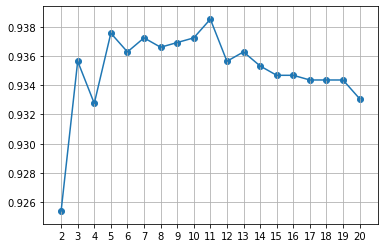

In [302]:
# display the results
plt.plot(range(2, 21), accuracy2)
plt.scatter(range(2, 21), accuracy2)
plt.grid()
_ =plt.xticks(range(2, 21))

Both 5 clusters and 11 clusters have similar accuracy. While 11 is a bit better, I will choose 5 clusters to help avoid overfitting the model

In [317]:
#Creating a KNN model with k value beign 5
model_11 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model_11.fit(X2_train, y2_train)

# gather the predictations that our model made for our test set
preds_11 = model_11.predict(X2_test)
print(classification_report(y2_test, preds_11))

              precision    recall  f1-score   support

         $1+       0.95      0.99      0.97      2754
    $10,000+       0.22      0.06      0.09        69
    $25,000+       0.86      0.65      0.74       300

    accuracy                           0.94      3123
   macro avg       0.68      0.57      0.60      3123
weighted avg       0.92      0.94      0.93      3123



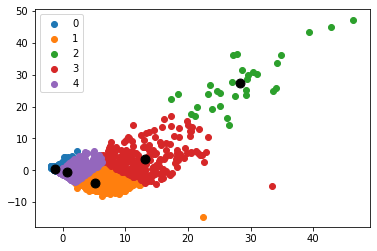

In [318]:
#Load Data
data = scaled_data
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

#Import KMeans module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 5)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

#Getting unique labels
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()